# Video Game Sales Analysis

This analysis aims to identify patterns that determine the success of video games using historical sales data, user and expert reviews, and other relevant attributes. The insights will help in planning advertising campaigns and understanding market trends.

In [1]:
!pip install pandas numpy matplotlib seaborn scipy

## Data Loading

Load the dataset and inspect its initial structure.

In [2]:
# Imports library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# Loading the dataset
try:
    file_path = r"C:\Users\nanor\Desktop\TripleTenNotes\TripleTen Projects\Data_Projects_TripleTen\Video_Game_Success_Analysis\Dataset\games.csv"
    data = pd.read_csv(file_path)

except:
    file_path = r"/datasets/games.csv"
    data = pd.read_csv(file_path)

In [4]:
# Working code
print(data.head())
print()
data.info()
print()
data.describe()

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## Data Preparation

Convert column names to lowercase and ensure correct data types for analysis.

In [5]:
# Convert column names to lowercase
data.columns = data.columns.str.lower()

# Display the updated columns
print("Updated column names:", data.columns)

# Convert year_of_release to datetime, and user_score to numeric
data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y', errors='coerce')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

# Display the updated data types
print("Updated data types:\n", data.dtypes)

Updated column names: Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')
Updated data types:
 name                       object
platform                   object
year_of_release    datetime64[ns]
genre                      object
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
critic_score              float64
user_score                float64
rating                     object
dtype: object


### Handling Missing Values

Identify and handle missing values to clean the dataset for accurate analysis.


In [6]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values before handling:\n", missing_values)

Missing values before handling:
 name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [7]:
# Handling missing values by removing rows with missing 'year_of_release', 'name', or 'genre'
data = data.dropna(subset=['year_of_release', 'name', 'genre'])

In [8]:
# For missing critic_score and user_score, use SimpleImputer from sklearn for data imputation
from sklearn.impute import SimpleImputer

# Impute missing critic_score with the mean
critic_imputer = SimpleImputer(strategy='mean')
data['critic_score'] = critic_imputer.fit_transform(data[['critic_score']])

# Impute missing user_score with the mean
user_imputer = SimpleImputer(strategy='mean')
data['user_score'] = user_imputer.fit_transform(data[['user_score']])

### Further Cleaning

Removing duplicates and ensure all relevant data is present.

In [9]:
# Fill missing 'rating' with 'Not Rated'
data['rating'].fillna('Not Rated', inplace=True)

In [10]:
# Check for duplicates
data = data.drop_duplicates()

In [11]:
# After handling missing values, recheck for any remaining missing values
missing_values_after = data.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

Missing values after handling:
 name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


### Intermediate Conclusion

In this section, we prepared the data for analysis by handling missing values using data imputation, converting data types, and checking for duplicates. Our hypotheses about the data include:

- The number of games released peaked in certain years and declined thereafter.
- Certain platforms have higher total sales compared to others.
- User and critic scores may influence total sales.
- Regional preferences vary for platforms and genres.

## Data Analysis

### Games Released Per Year

Plot the number of games released each year to identify trends.

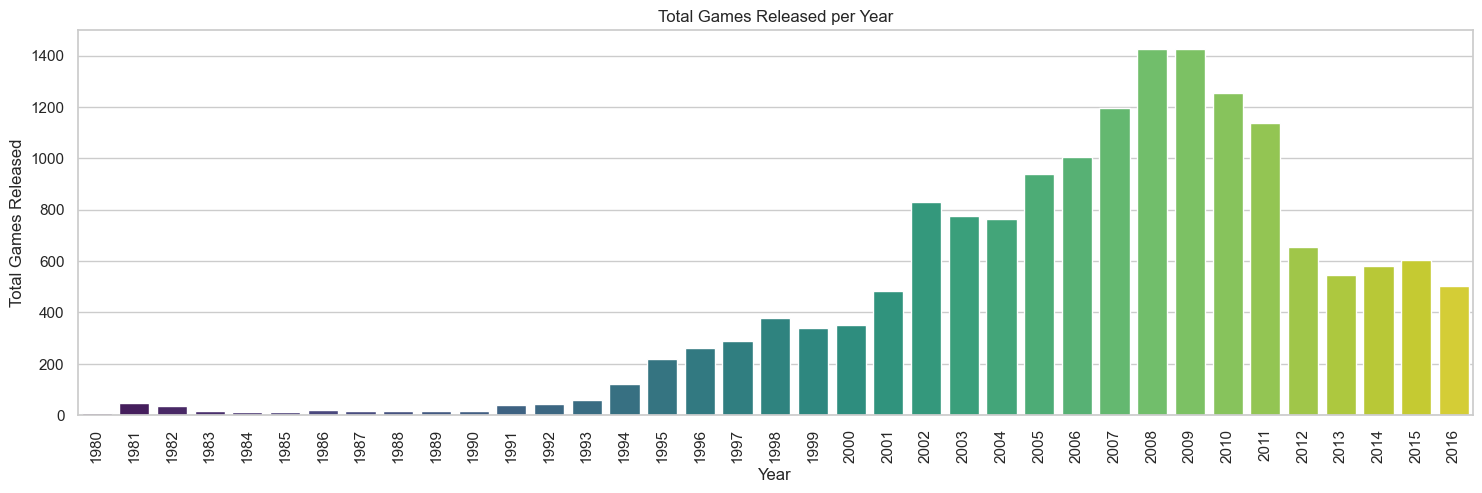

In [12]:
# Extract the year from the 'year_of_release' column
data['year_of_release'] = data['year_of_release'].dt.year

# Plot the number of games released each year
games_per_year = data['year_of_release'].value_counts().sort_index()

# Enhanced visualization using seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(18, 5))
sns.countplot(data=data, x='year_of_release', palette='viridis')
plt.title('Total Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Total Games Released')
plt.xticks(rotation=90)
plt.show()

In [13]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

print(data.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score     rating  \
0     28.96      3.77         8.45     76.000000     8.00000          E   
1      3.58      6.81         0.77     68.994363     7.12633  Not Rated   
2     12.76      3.79         3.29     82.000000     8.30000          E   
3     10.93      3.28         2.95     80.000000     8.00000          E   
4      8.89     10.22         1.00     68.994363     7.12633  Not Rated   

   total_sales  
0        82.54  
1        40.24  
2        35

### Sales by Platform

Calculate and plot total sales by platform to identify the most successful platforms.

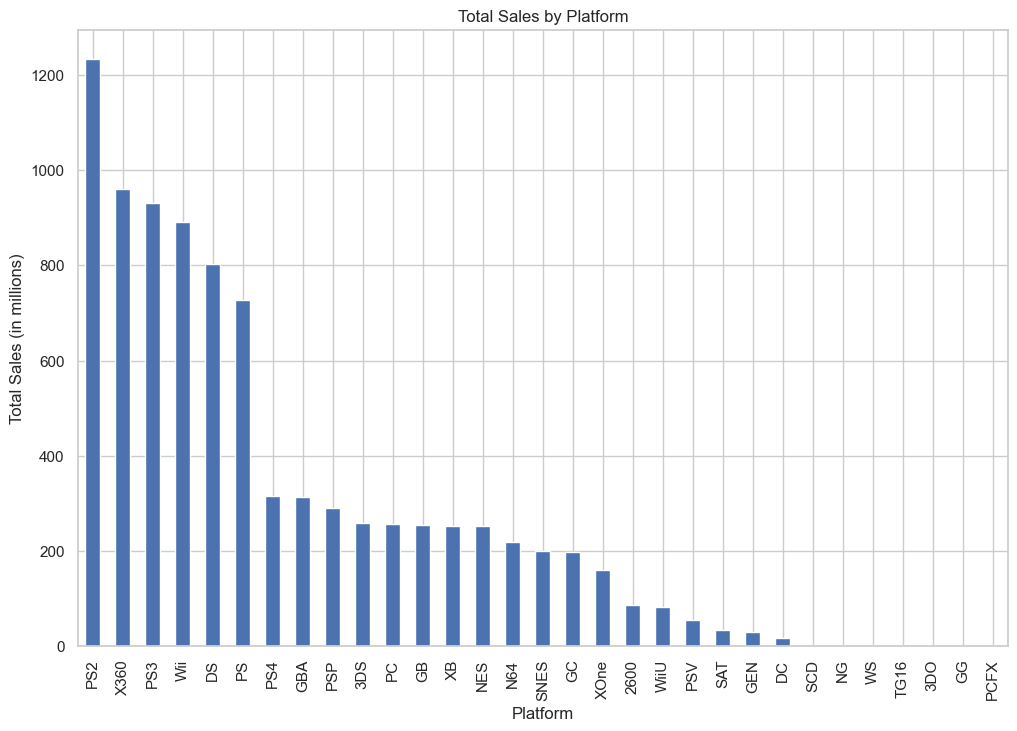

In [14]:
# Calculate total sales per platform
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
platform_sales.plot(kind='bar')
plt.title('Total Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.show()

### Sales by Platform

Calculate and plot total sales by platform to identify the most successful platforms.

In [15]:
# Identify platforms with the greatest total sales
top_platforms = platform_sales.head(10)
print("Top platforms by total sales:\n", top_platforms)

Top platforms by total sales:
 platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64


### Platform Sales Over Time

Analyze sales over time for top platforms to observe their lifecycle and trends.

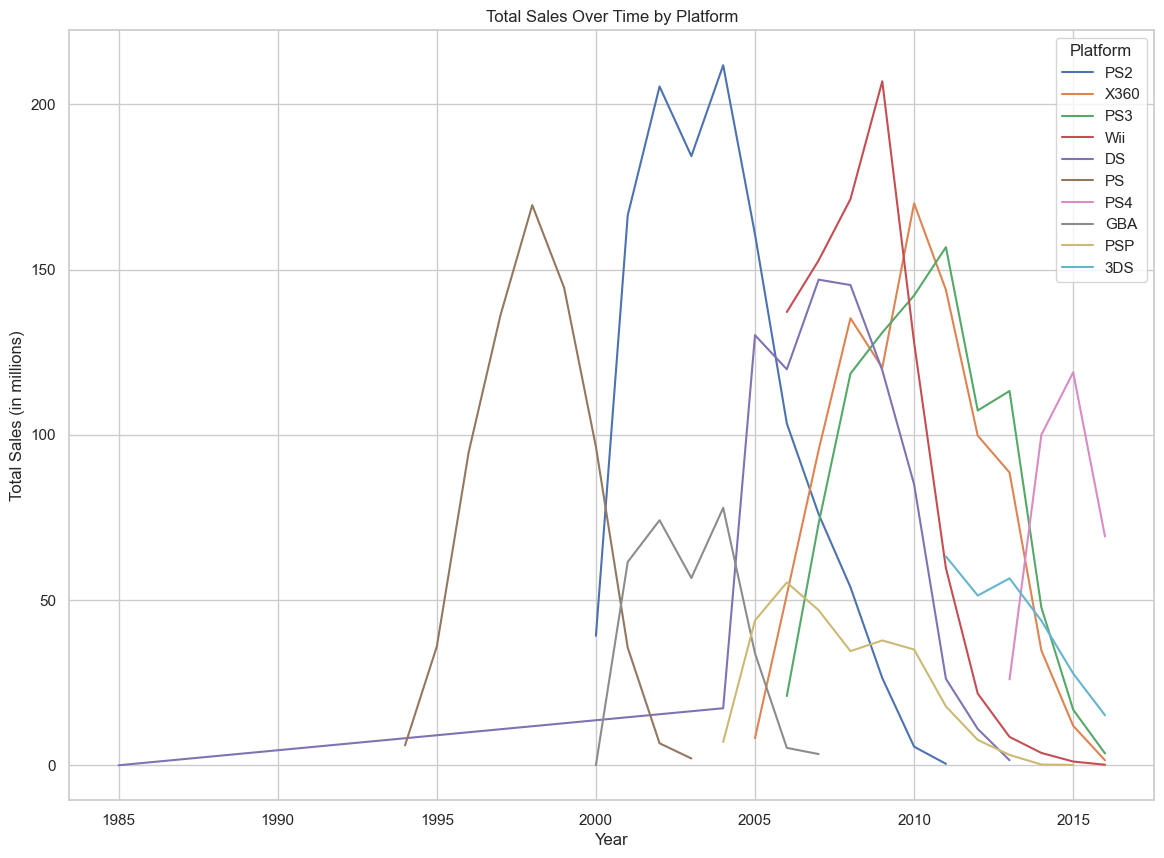

In [16]:
# Analyze sales over time for top platforms
plt.figure(figsize=(14, 10))
for platform in top_platforms.index:
    platform_data = data[data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    plt.plot(platform_data, label=platform)

plt.title('Total Sales Over Time by Platform')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend(title='Platform')
plt.show()


### Filter Relevant Data

Focus on data from the last 2-3 years (2014-2016) for more relevant insights.

In [17]:
# Filter data for the period 2014-2016 (last 3 years)
relevant_data = data[data['year_of_release'] >= 2014]

# Verify the filtered data
print("Filtered data from 2014 onwards:")
display(relevant_data.head())


Filtered data from 2014 onwards:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,68.994363,7.12633,Not Rated,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.000000,8.30000,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,68.994363,7.12633,Not Rated,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.000000,4.30000,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,68.994363,7.12633,Not Rated,7.98


### Standard Deviation and Variance for Total Sales

Calculate the standard deviation and variance for the total sales to understand the distribution of sales data.

In [18]:
# Standard deviation and variance for total sales
std_dev = relevant_data['total_sales'].std()
variance = relevant_data['total_sales'].var()
print(f"Standard Deviation of Total Sales: {std_dev}")
print(f"Variance of Total Sales: {variance}")

Standard Deviation of Total Sales: 1.056109345997921
Variance of Total Sales: 1.1153669507041564


### Global Sales Distribution by Platform

Build a box plot to visualize the distribution of global sales by platform.

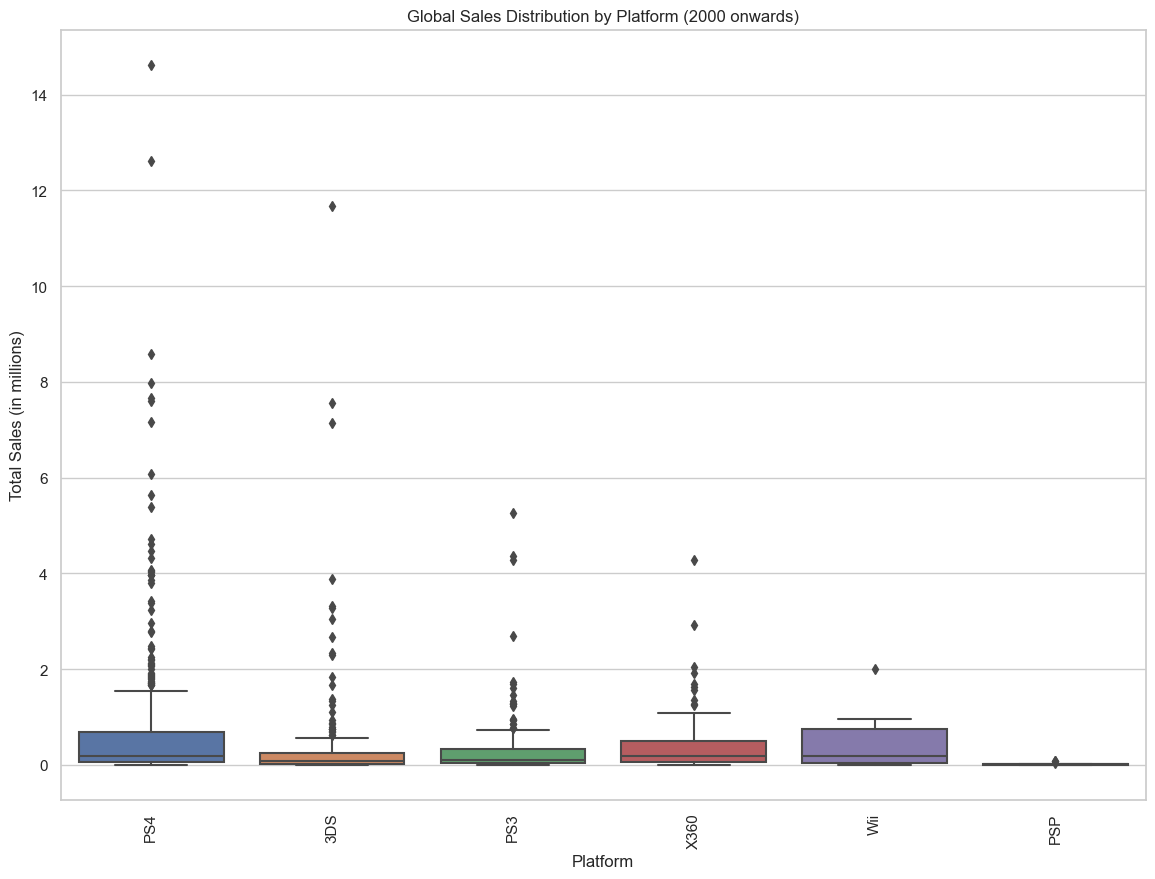

In [19]:
# Box plot for global sales by platform

plt.figure(figsize=(14, 10))
sns.boxplot(x='platform', y='total_sales', data=relevant_data[relevant_data['platform'].isin(top_platforms.index)])
plt.title('Global Sales Distribution by Platform (2000 onwards)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=90)
plt.show()


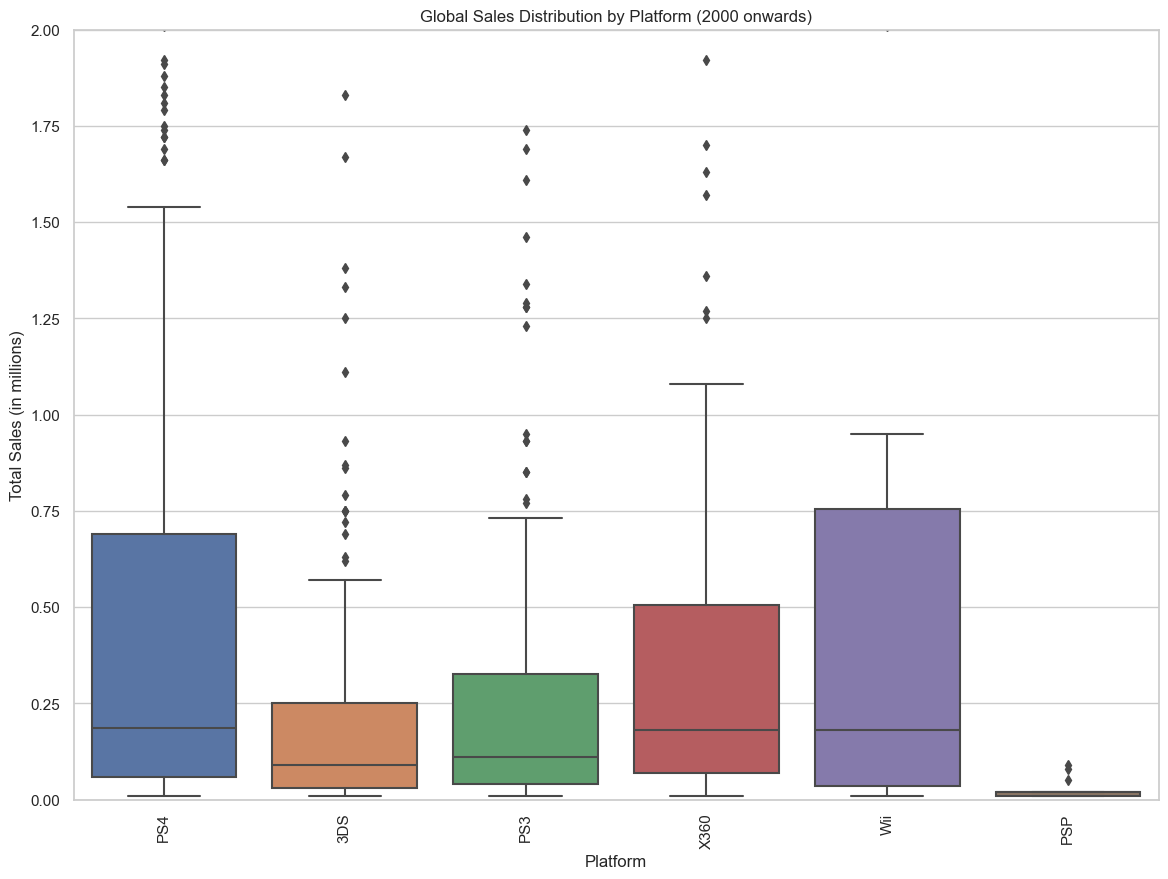

In [20]:
# Box plot for global sales by platform with adjusted y-axis limits
plt.figure(figsize=(14, 10))
sns.boxplot(x='platform', y='total_sales', data=relevant_data[relevant_data['platform'].isin(top_platforms.index)])
plt.ylim(0, 2)  # Adjust the limit as needed to focus on the lower part
plt.title('Global Sales Distribution by Platform (2000 onwards)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

### Review Impact on Sales for Multiple Platforms

Analyze the effect of user and professional reviews on sales for multiple popular platforms.


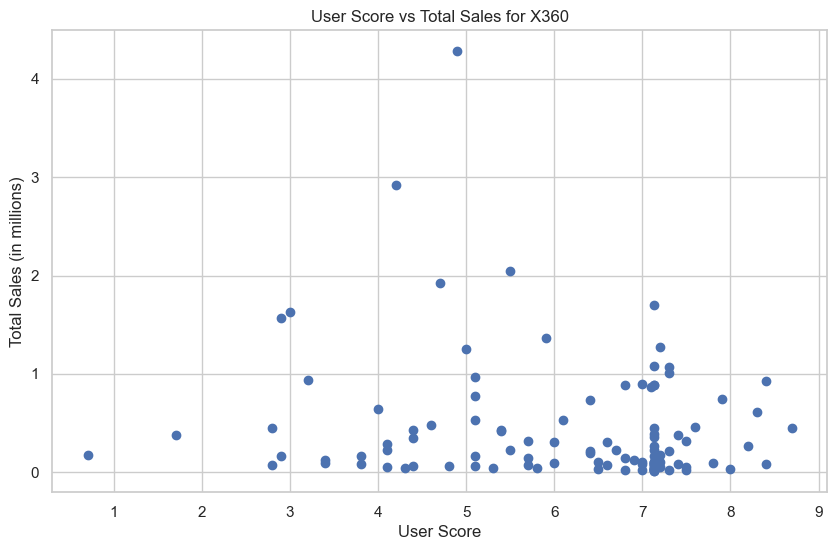

Correlation between user score and total sales for X360: -0.17906087575456228


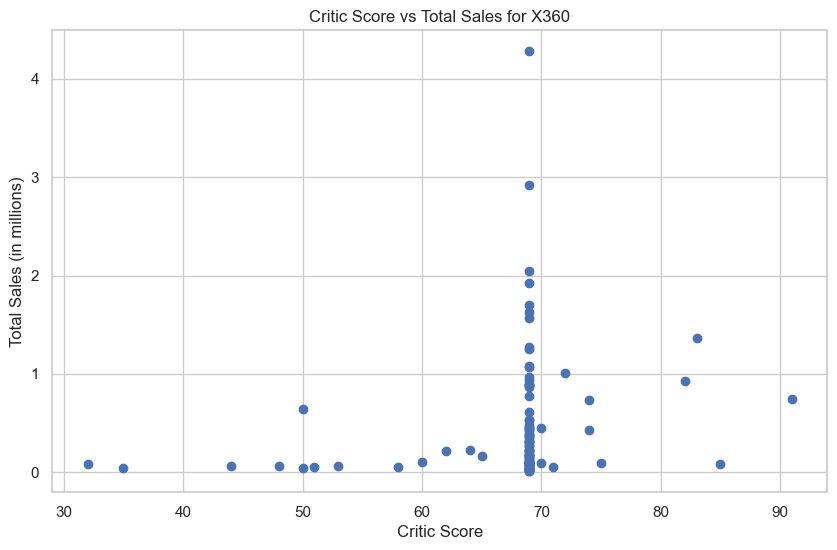

Correlation between critic score and total sales for X360: 0.1759176413172117



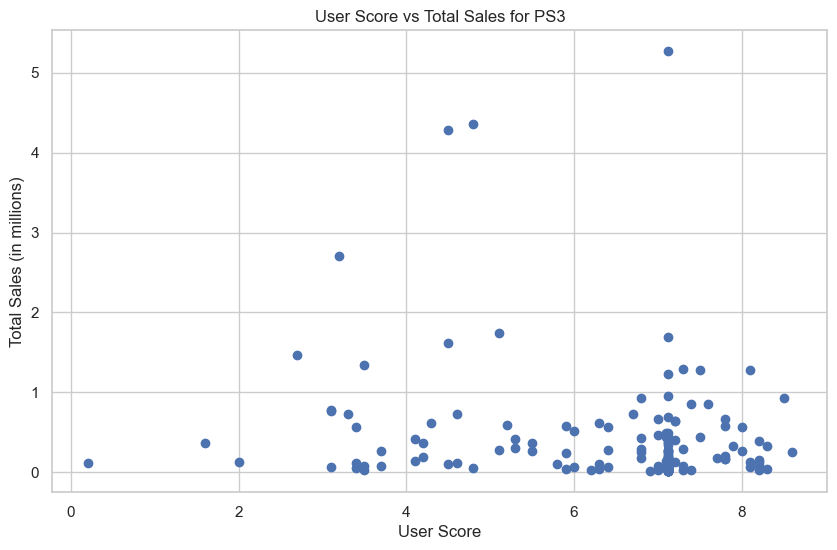

Correlation between user score and total sales for PS3: -0.22220286369306683


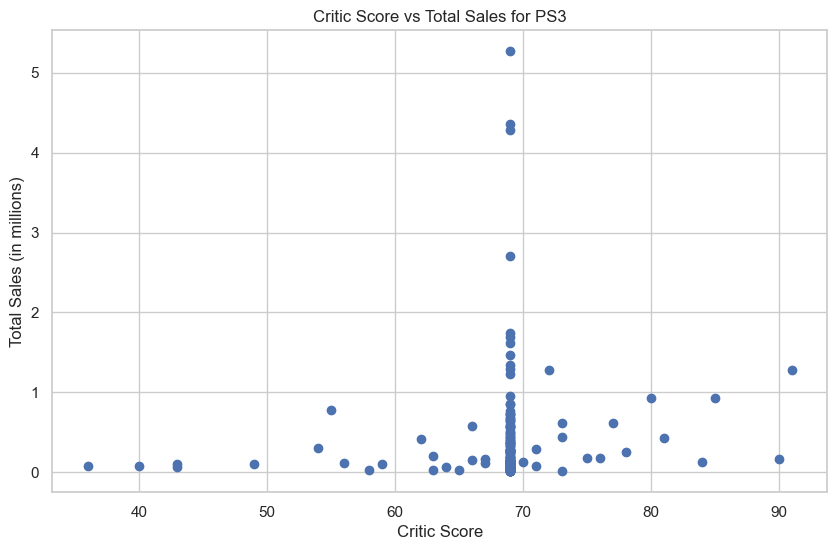

Correlation between critic score and total sales for PS3: 0.0960581199512943



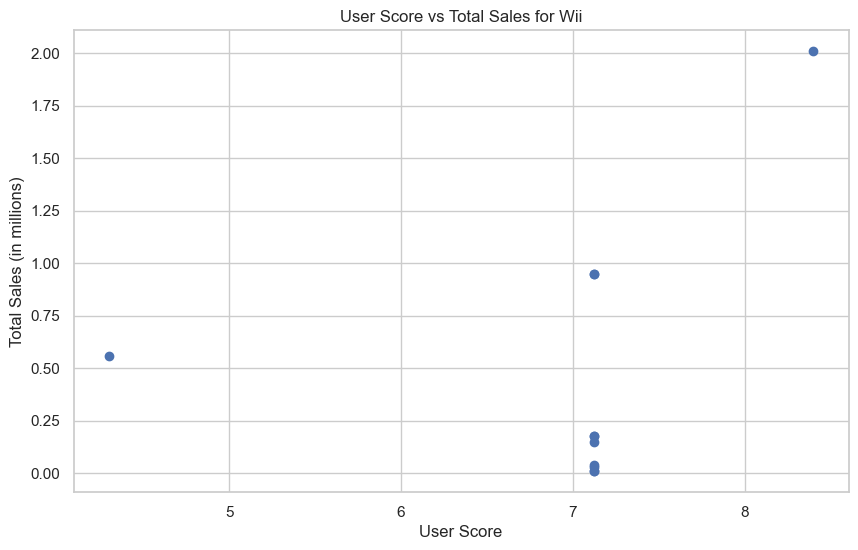

Correlation between user score and total sales for Wii: 0.27931498558179885


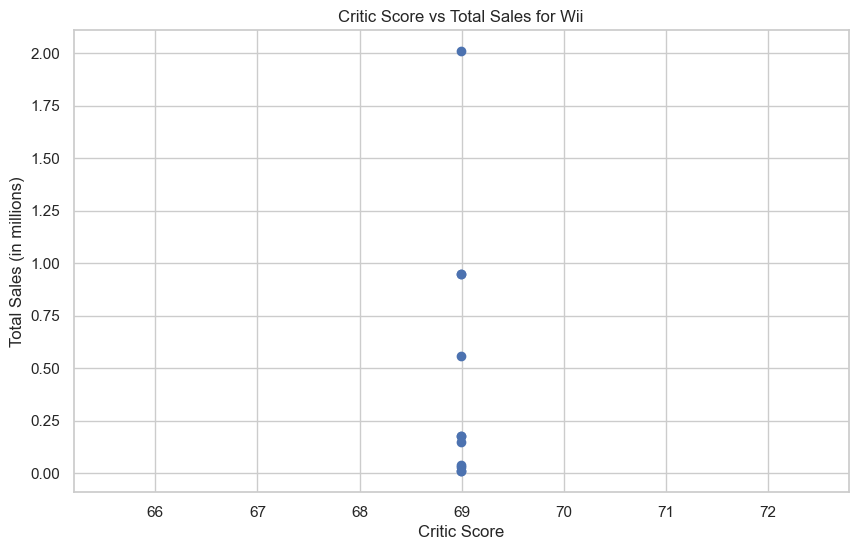

Correlation between critic score and total sales for Wii: -5.07740462634636e-17



In [21]:
# Define the platforms to analyze
platforms = ['X360', 'PS3', 'Wii']

# Function to plot and calculate correlation for user and critic scores
def plot_and_calculate_correlation(platform, relevant_data):
    platform_data = relevant_data[relevant_data['platform'] == platform]
    
    # Scatter plot for user score vs total sales
    plt.figure(figsize=(10, 6))
    plt.scatter(platform_data['user_score'], platform_data['total_sales'])
    plt.title(f'User Score vs Total Sales for {platform}')
    plt.xlabel('User Score')
    plt.ylabel('Total Sales (in millions)')
    plt.show()
    
    # Calculate correlation for user score
    user_score_correlation = platform_data['user_score'].corr(platform_data['total_sales'])
    print(f"Correlation between user score and total sales for {platform}: {user_score_correlation}")
    
    # Scatter plot for critic score vs total sales
    plt.figure(figsize=(10, 6))
    plt.scatter(platform_data['critic_score'], platform_data['total_sales'])
    plt.title(f'Critic Score vs Total Sales for {platform}')
    plt.xlabel('Critic Score')
    plt.ylabel('Total Sales (in millions)')
    plt.show()
    
    # Calculate correlation for critic score
    critic_score_correlation = platform_data['critic_score'].corr(platform_data['total_sales'])
    print(f"Correlation between critic score and total sales for {platform}: {critic_score_correlation}")
    print()

# Analyze the platforms
for platform in platforms:
    plot_and_calculate_correlation(platform, relevant_data)

### Genre Analysis

Identify the most profitable genres by analyzing total sales by genre.

In [22]:
# Calculate total, average, and median sales per genre
genre_sales_total = relevant_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales_mean = relevant_data.groupby('genre')['total_sales'].mean().sort_values(ascending=False)
genre_sales_median = relevant_data.groupby('genre')['total_sales'].median().sort_values(ascending=False)

# Display most profitable genres by total, average, and median sales
print("Most profitable genres by total sales:\n", genre_sales_total)
print("Most profitable genres by average sales:\n", genre_sales_mean)
print("Most profitable genres by median sales:\n", genre_sales_median)

Most profitable genres by total sales:
 genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64
Most profitable genres by average sales:
 genre
Shooter         1.335469
Sports          0.680000
Platform        0.476053
Fighting        0.470333
Role-Playing    0.459005
Racing          0.398841
Misc            0.332301
Action          0.322068
Simulation      0.298409
Puzzle          0.157857
Strategy        0.107027
Adventure       0.094865
Name: total_sales, dtype: float64
Most profitable genres by median sales:
 genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0

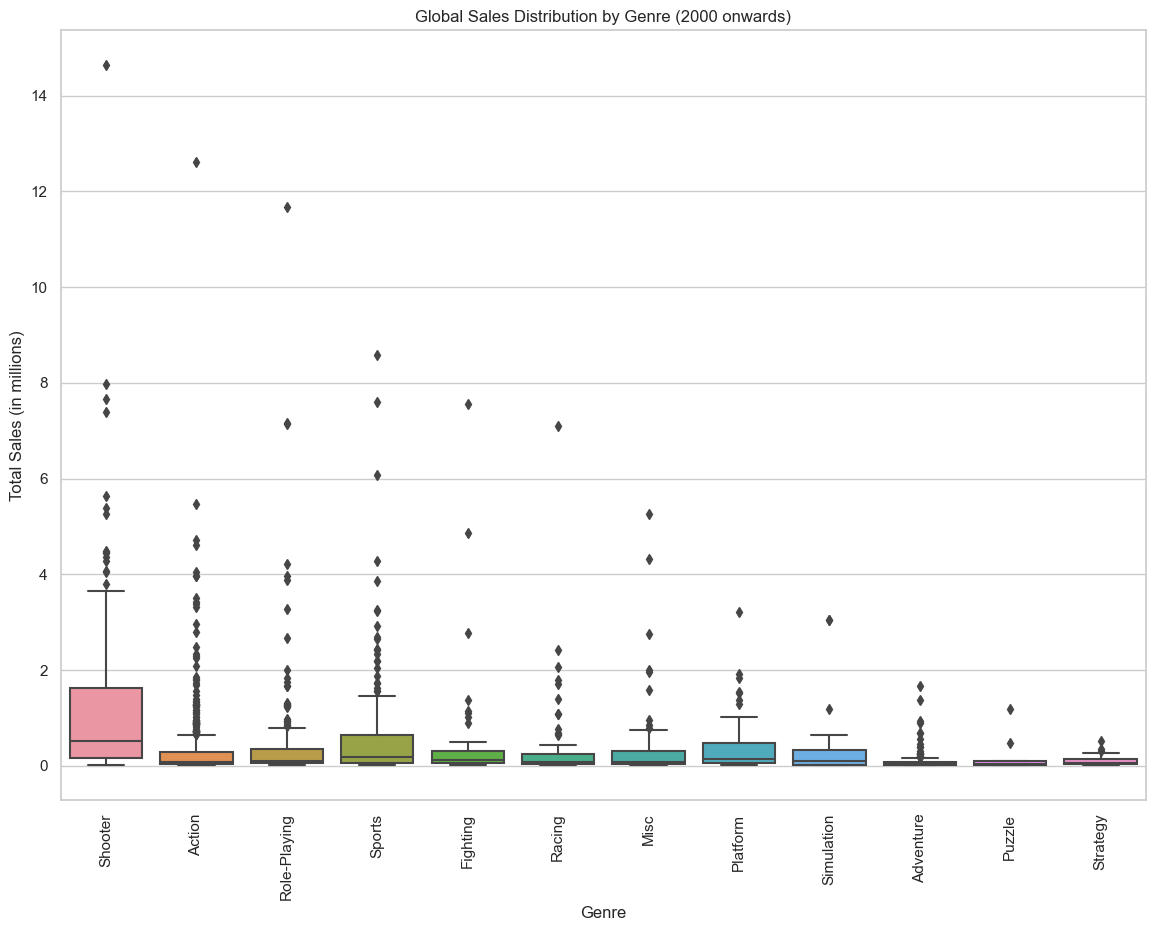

In [23]:
# Box plot for global sales by genre
plt.figure(figsize=(14, 10))
sns.boxplot(x='genre', y='total_sales', data=relevant_data)
plt.title('Global Sales Distribution by Genre (2000 onwards)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=90)
plt.show()

## Regional Analysis

### Top Platforms and Genres by Region

Determine the top platforms and genres for each region (NA, EU, JP).

Top platforms in na_sales:
platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

Top genres in na_sales:
genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

Top platforms in eu_sales:
platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

Top genres in eu_sales:
genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

Top platforms in jp_sales:
platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

Top genres in jp_sales:
genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64



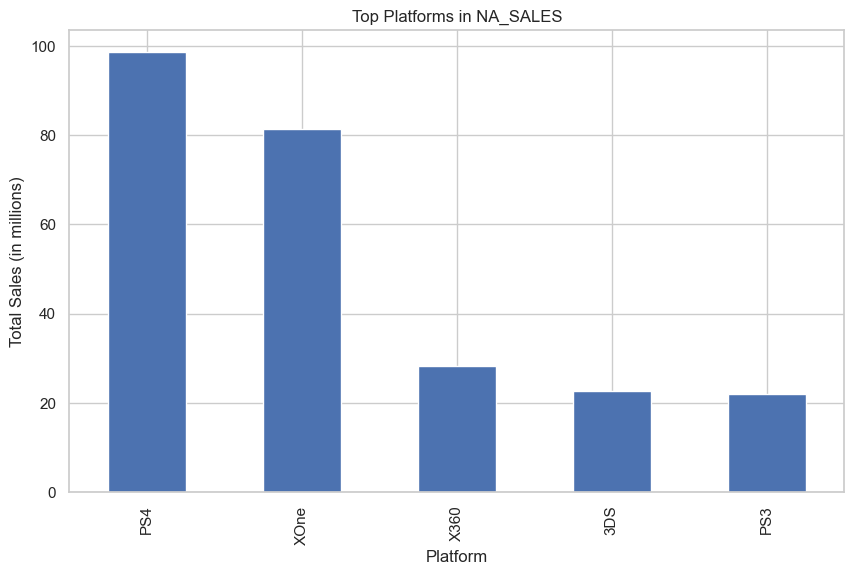

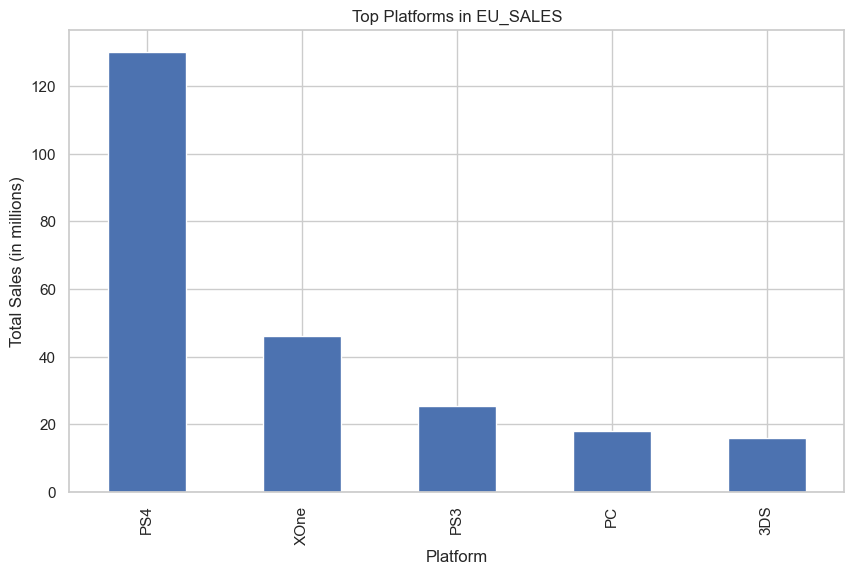

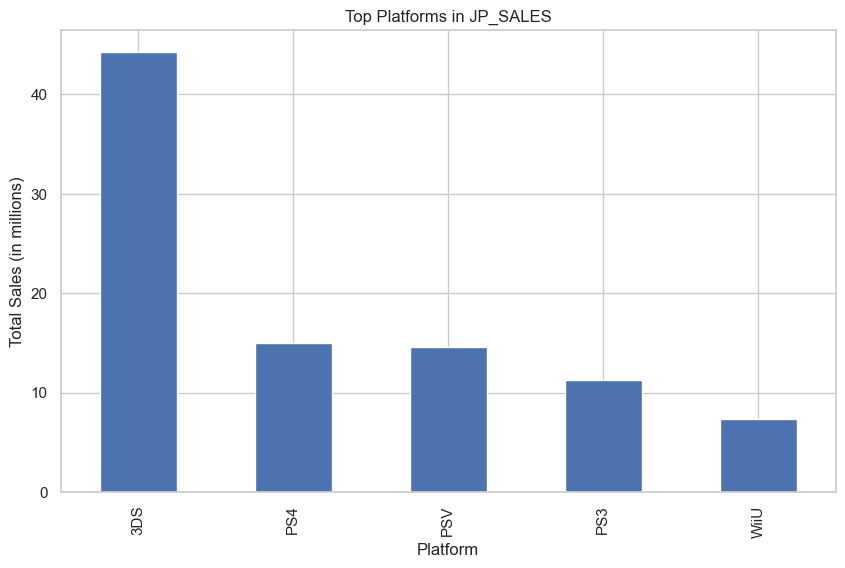

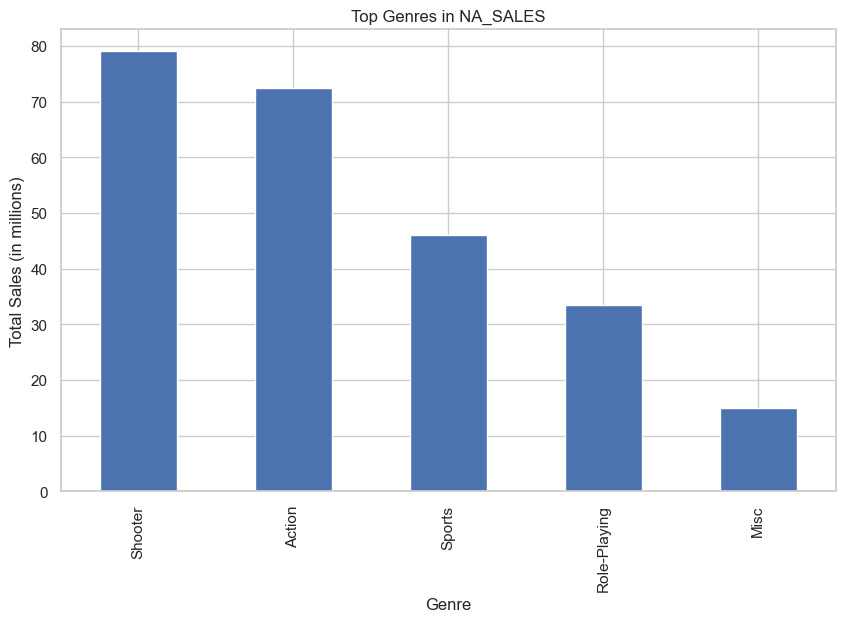

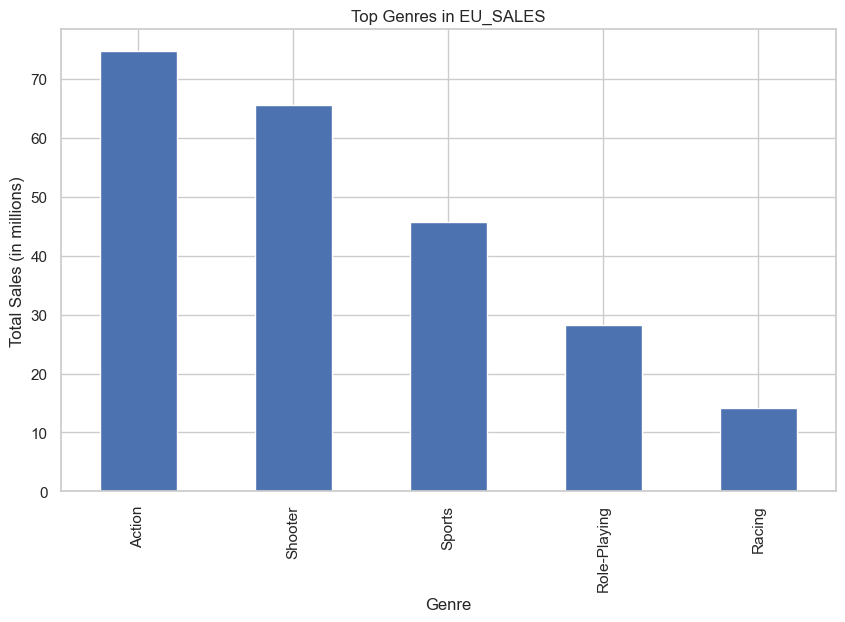

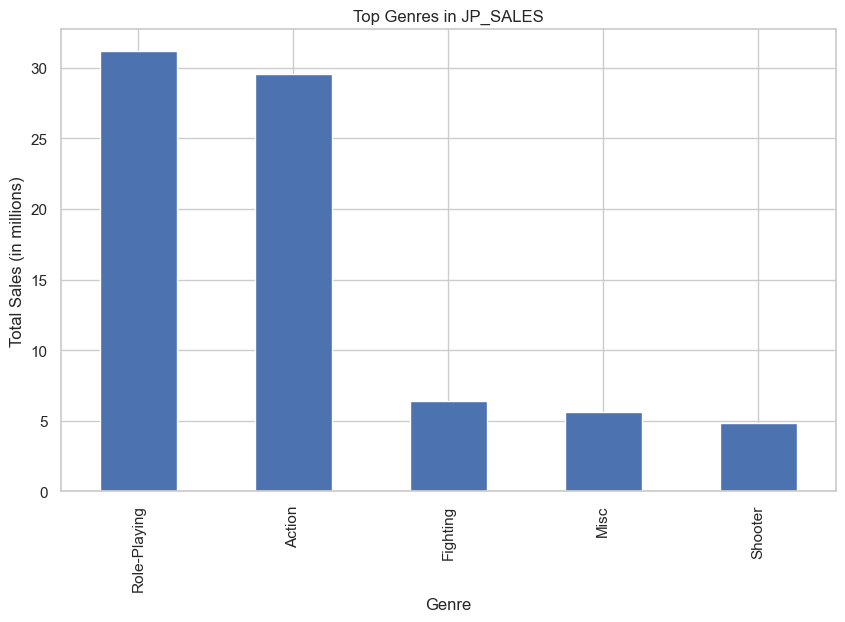

In [24]:
# Define regions
regions = ['na_sales', 'eu_sales', 'jp_sales']

# Function to get top platforms and genres for a region
def top_platforms_genres_by_region(region):
    top_platforms = relevant_data.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    top_genres = relevant_data.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    return top_platforms, top_genres

# Getting top platforms and genres for each region
for region in regions:
    top_platforms, top_genres = top_platforms_genres_by_region(region)
    print(f"Top platforms in {region}:\n{top_platforms}\n")
    print(f"Top genres in {region}:\n{top_genres}\n")
    
# Visualization of top platforms by region
for region in regions:
    top_platforms, _ = top_platforms_genres_by_region(region)
    plt.figure(figsize=(10, 6))
    top_platforms.plot(kind='bar')
    plt.title(f'Top Platforms in {region.upper()}')
    plt.xlabel('Platform')
    plt.ylabel('Total Sales (in millions)')
    plt.show()

# Visualization of top genres by region
for region in regions:
    _, top_genres = top_platforms_genres_by_region(region)
    plt.figure(figsize=(10, 6))
    top_genres.plot(kind='bar')
    plt.title(f'Top Genres in {region.upper()}')
    plt.xlabel('Genre')
    plt.ylabel('Total Sales (in millions)')
    plt.show()

### ESRB Ratings Impact on Sales

Analyze whether ESRB ratings affect sales in individual regions.

In [25]:
# Function to get sales by ESRB rating for a region
def sales_by_esrb_rating(region):
    sales_by_rating = relevant_data.groupby('rating')[region].sum().sort_values(ascending=False)
    return sales_by_rating

# Getting sales by ESRB rating for each region
for region in regions:
    sales_by_rating = sales_by_esrb_rating(region)
    print(f"Sales by ESRB rating in {region}:\n{sales_by_rating}\n")

Sales by ESRB rating in na_sales:
rating
M            96.42
Not Rated    64.72
E            50.74
T            38.95
E10+         33.23
Name: na_sales, dtype: float64

Sales by ESRB rating in eu_sales:
rating
M            93.44
Not Rated    58.95
E            58.06
T            34.07
E10+         26.16
Name: eu_sales, dtype: float64

Sales by ESRB rating in jp_sales:
rating
Not Rated    56.90
T            14.78
E             8.94
M             8.01
E10+          4.46
Name: jp_sales, dtype: float64



## Hypothesis Testing

### Hypothesis 1: Average User Ratings of Xbox One and PC

**Null Hypothesis (H0):** The average user ratings of the Xbox One and PC platforms are the same.
**Alternative Hypothesis (H1):** The average user ratings of the Xbox One and PC platforms are different.

Test whether the average user ratings of Xbox One and PC platforms are the same.


In [26]:
# Significance level
alpha = 0.05

# Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same

# Extracting user ratings for Xbox One and PC
xbox_one_ratings = relevant_data[relevant_data['platform'] == 'XOne']['user_score'].dropna()
pc_ratings = relevant_data[relevant_data['platform'] == 'PC']['user_score'].dropna()

# Performing the t-test
t_stat_1, p_value_1 = stats.ttest_ind(xbox_one_ratings, pc_ratings)

# Conclusion for Hypothesis 1
if p_value_1 < alpha:
    print(f"Reject the null hypothesis for Hypothesis 1. P-value: {p_value_1}")
else:
    print(f"Fail to reject the null hypothesis for Hypothesis 1. P-value: {p_value_1}")


Reject the null hypothesis for Hypothesis 1. P-value: 0.0460659896764308


### Hypothesis 2: Average User Ratings for Action and Sports Genres

**Null Hypothesis (H0):** The average user ratings for the Action and Sports genres are the same.
**Alternative Hypothesis (H1):** The average user ratings for the Action and Sports genres are different.

Test whether the average user ratings for Action and Sports genres are different.

In [27]:
# Hypothesis 2: Average user ratings for the Action and Sports genres are different

# Extracting user ratings for Action and Sports genres
action_ratings = relevant_data[relevant_data['genre'] == 'Action']['user_score'].dropna()
sports_ratings = relevant_data[relevant_data['genre'] == 'Sports']['user_score'].dropna()

# Performing the t-test
t_stat_2, p_value_2 = stats.ttest_ind(action_ratings, sports_ratings)

# Conclusion for Hypothesis 2
if p_value_2 < alpha:
    print(f"Reject the null hypothesis for Hypothesis 2. P-value: {p_value_2}")
else:
    print(f"Fail to reject the null hypothesis for Hypothesis 2. P-value: {p_value_2}")

Reject the null hypothesis for Hypothesis 2. P-value: 7.603225537791456e-33


## General Conclusion

### Overview
This analysis aimed to identify patterns that determine the success of video games using historical sales data, user and expert reviews, and other relevant attributes.

### Key Findings

#### Data Preparation
- The dataset was cleaned and prepared, addressing missing values and ensuring appropriate data types for analysis.
- Total sales were calculated for each game across different regions.

#### Analysis Insights

**Games Released Per Year**
- The number of games released peaked around 2008 and declined afterward, indicating market saturation and shifting industry trends.

**Sales by Platform**
- Platforms like PS2, X360, and PS3 showed the highest total sales.
- PS2 had the highest total sales overall, followed by X360 and PS3.

**Platform Trends**
- Platforms exhibit a lifecycle with rise and decline periods.
- New platforms tend to appear every few years, while old ones fade away, showing the fast-paced evolution of gaming technology.

**Review Impact**
- Critic scores have a moderate positive correlation with total sales on the X360 platform.
- User scores have a weak correlation with total sales across multiple platforms, suggesting that critic reviews might be a more reliable indicator of sales performance.

**Genre Analysis**
- Action, Shooter, and Sports genres are the most profitable based on total sales.
- Shooter games are the most profitable when considering average and median sales, indicating consistent high performance across releases.

**Regional Preferences**
- Top platforms and genres vary by region (NA, EU, JP), reflecting regional preferences in gaming.
- ESRB ratings have different impacts on sales in each region, with M (Mature) rated games generally having higher sales in NA and EU.

#### Hypothesis Testing

**Hypothesis 1**
- Null Hypothesis (H0): The average user ratings of the Xbox One and PC platforms are the same.
- Alternative Hypothesis (H1): The average user ratings of the Xbox One and PC platforms are different.
- **Result**: Reject the null hypothesis. There is a significant difference in average user ratings between Xbox One and PC platforms (P-value: 0.046).

**Hypothesis 2**
- Null Hypothesis (H0): The average user ratings for the Action and Sports genres are the same.
- Alternative Hypothesis (H1): The average user ratings for the Action and Sports genres are different.
- **Result**: Reject the null hypothesis. There is a significant difference in average user ratings between Action and Sports genres (P-value: 7.603225537791456e-33).

### Conclusion
The analysis provided valuable insights into the gaming industry, highlighting the importance of critic reviews, platform lifecycle trends, and regional preferences. These findings can inform future advertising campaigns and strategic decisions for the online store Ice. Understanding these patterns allows for better-targeted marketing strategies, potentially leading to higher sales and customer satisfaction.
